In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# One-Way ANOVA

In [153]:
np.random.seed(42)
data = {
    'Method': np.repeat(['A', 'B', 'C','D','E'], [30, 25, 25,40,10]),  # Different sizes for each method
    'Exam_Score': np.concatenate([
        np.random.normal(78, 3, 30),  # Method A
        np.random.normal(85, 4, 25),  # Method B
        np.random.normal(75, 5, 25),  # Method C
        np.random.normal(85, 6, 40),  # Method D
        np.random.normal(85, 5, 10),  # Method E
    ])
}


df_1 = pd.DataFrame(data)

In [154]:
A_Method = np.array(df_1['Exam_Score'][df_1['Method']=='A'])
B_Method = np.array(df_1['Exam_Score'][df_1['Method']=='B'])
C_Method = np.array(df_1['Exam_Score'][df_1['Method']=='C'])
D_Method = np.array(df_1['Exam_Score'][df_1['Method']=='D'])
E_Method = np.array(df_1['Exam_Score'][df_1['Method']=='E'])

In [160]:
stats.f_oneway(A_Method , B_Method , C_Method,D_Method,E_Method)

F_onewayResult(statistic=28.741690544241735, pvalue=6.13763027891624e-17)

Since the p_value is less than 0.05, there is a high evidence that these methods have different means, we are interesed in envistigating what is the categorie(s) that has a different mean from the others

## Post-Hoc Test

In [187]:
methods = ['A','B','C','D','E']
method_pairs = []

for meth1 in range(4):
    for meth2 in range(meth1 + 1, 5):
        
        method_pairs.append((methods[meth1],methods[meth2]))
        
for meth1,meth2 in method_pairs:
    
    print(meth1, meth2,"\n")
    
    df1 = df_1['Exam_Score'][df_1['Method']==meth1]
    
    df2 = df_1['Exam_Score'][df_1['Method']==meth2]
    
    print(stats.ttest_ind( df1 , df2 ))
    
    print("\n")

A B 

TtestResult(statistic=-7.715599020577419, pvalue=3.1907699647327366e-10, df=53.0)


A C 

TtestResult(statistic=2.13894570151021, pvalue=0.03706589425932617, df=53.0)


A D 

TtestResult(statistic=-7.34958996269646, pvalue=3.315996238878648e-10, df=68.0)


A E 

TtestResult(statistic=-5.901507060728502, pvalue=7.770633496138256e-07, df=38.0)


B C 

TtestResult(statistic=7.0631147221918384, pvalue=5.885021544174283e-09, df=48.0)


B D 

TtestResult(statistic=-0.6810138251223251, pvalue=0.49835831026858346, df=63.0)


B E 

TtestResult(statistic=-0.6644846551360075, pvalue=0.510997050790577, df=33.0)


C D 

TtestResult(statistic=-7.5284077810528425, pvalue=2.38564152017516e-10, df=63.0)


C E 

TtestResult(statistic=-5.090438129301792, pvalue=1.4130489755365947e-05, df=33.0)


D E 

TtestResult(statistic=-0.15422061467171194, pvalue=0.8780824018954851, df=48.0)




To identify groups that genuinely differ from each other and mitigate the issue of multiple comparisons, we employ the Bonferroni Correction. This adjustment is crucial for controlling the elevated risk of Type I errors, as the likelihood of encountering a false positive result increases with the number of comparisons made. In essence, the Bonferroni Correction helps maintain the overall significance level and minimizes the probability of incorrectly rejecting the null hypothesis when assessing multiple pairwise comparisons.

So rather than seeking p-values below 0.05, we set a more stringent threshold of 0.05 divided by the number of comparisons (10 in this case), which is 0.005

## Tukey's test (Other alternative for Post-Hoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   6.8085    0.0   3.4141 10.2029   True
     A      C  -2.3432  0.317  -5.7376  1.0512  False
     A      D   7.6255    0.0   4.5981 10.6529   True
     A      E   7.9141    0.0   3.3371 12.4911   True
     B      C  -9.1517    0.0 -12.6971 -5.6064   True
     B      D    0.817 0.9544  -2.3787  4.0127  False
     B      E   1.1055 0.9659  -3.5845  5.7956  False
     C      D   9.9687    0.0    6.773 13.1644   True
     C      E  10.2573    0.0   5.5673 14.9473   True
     D      E   0.2886 0.9998  -4.1431  4.7202  False
-----------------------------------------------------


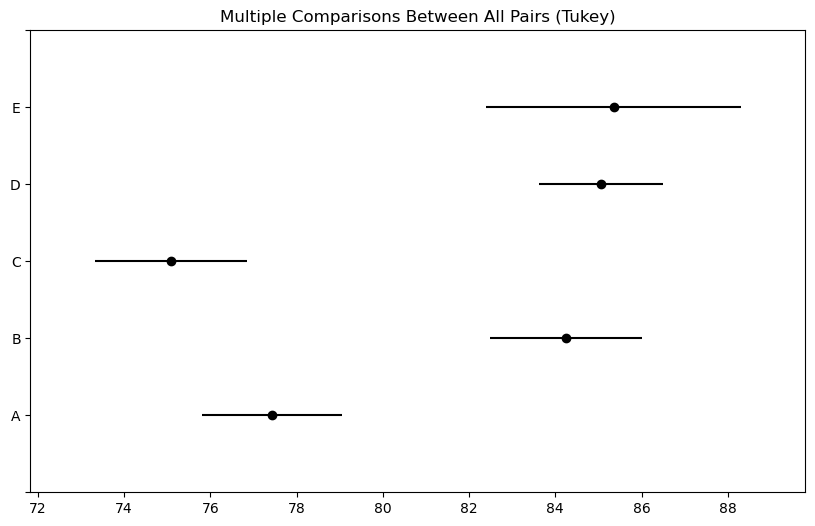

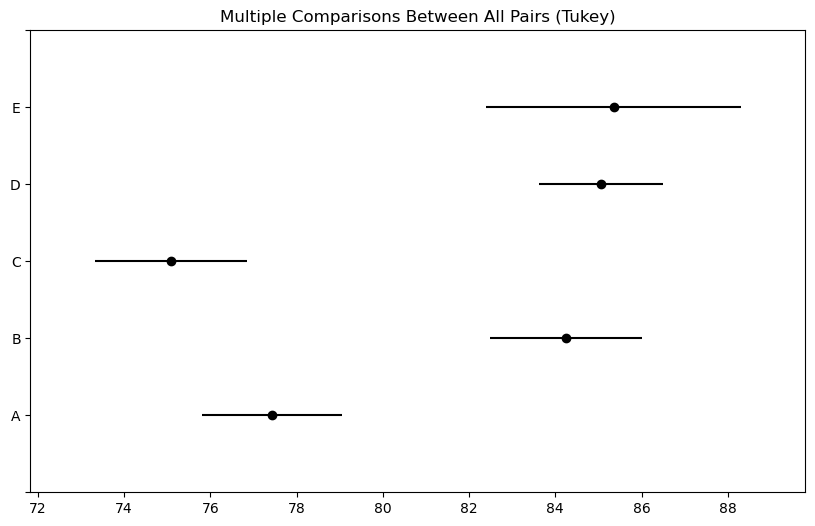

In [197]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(df_1['Exam_Score'], df_1['Method'], alpha=0.05)

print(tukey_results)

tukey_results.plot_simultaneous()


Tukey's test outcomes align with the results obtained from the Post-Hoc Test using Bonferroni Correction.